<a href="https://colab.research.google.com/github/Sergius-DS/elecciOn_datasets/blob/main/diabetes_EDA_Limpieza_30_Nov2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA SET DIABETES

# EDA

In [ ]:
# =================================================================================
# MANIPULACIÓN Y ANÁLISIS DE DATOS
# =================================================================================
import pandas as pd  # Para manipulación de datos en estructuras tipo DataFrame
import numpy as np  # Para cálculos numéricos y operaciones matriciales

# =================================================================================
# GESTIÓN DE ADVERTENCIAS
# =================================================================================
import warnings  # Para manejar y silenciar advertencias
warnings.filterwarnings('ignore')  # Ignorar advertencias para una salida más limpia

# =================================================================================
# FUNCIONES PERSONALIZADAS
# =================================================================================
# Importación de funciones creadas por el usuario
# Ejemplo: funciones como categorizar_columnas, verifica_consistencia_filas
from funciones import *

# =================================================================================
# CONFIGURACIÓN DE PANDAS
# =================================================================================
# Mostrar todas las columnas en las salidas de DataFrame
pd.set_option('display.max_columns', None)
# Configurar formato para números decimales
pd.set_option('display.float_format', '{:.2f}'.format)

# =================================================================================
# VISUALIZACIÓN DE DATOS
# =================================================================================
import matplotlib.pyplot as plt  # Herramientas de visualización general
import matplotlib.image as mpimg  # Para trabajar con imágenes
import matplotlib.patches as mpatches
import seaborn as sns  # Visualización avanzada basada en Matplotlib

# =================================================================================
# PREPROCESAMIENTO DE DATOS
# =================================================================================
# Codificar variables categóricas en etiquetas numéricas
from sklearn.preprocessing import LabelEncoder

# =================================================================================
# DIVISIÓN DE DATOS Y SELECCIÓN DE CARACTERÍSTICAS
# =================================================================================
# Dividir datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE  # Eliminación recursiva de características
from sklearn.linear_model import LogisticRegression  # Modelo de regresión logística

# =================================================================================
# ANÁLISIS ESTADÍSTICO
# =================================================================================
from scipy import stats  # Funciones estadísticas y pruebas de hipótesis
import statsmodels.api as sm  # Modelos estadísticos avanzados
# Calcular factores de inflación de la varianza (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
ds = pd.read_csv('data_diabetes_limpio.csv')

In [ ]:
ds.head()

,FECHA_AFILIADOS_SIS,CODIGO_ANONIMIZADO,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,FECHA_PRIMER_DX,TIPO_DIABETES,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,HOSPITALIZADO,UBICACION,latitud,longitud,AÑO
0,2023-09-30,000015CA7003D37272A17DE250F6AFE9339F487360EC50...,75,70101,CALLAO,CALLAO,CALLAO,MASCULINO,2018-01-05,Diabetes mellitus tipo 2,1,1,0,1,6.60,0,0.00,0,0,CALLAO-CALLAO-CALLAO,-12.06,-77.15,2018
1,2023-03-31,0000249BA42728EB9AF192293384E60E78449CE1DDA27A...,62,110106,ICA,ICA,PARCONA,MASCULINO,2018-08-09,Diabetes mellitus tipo 2,0,0,0,0,0.00,0,0.00,0,0,ICA-ICA-PARCONA,-14.05,-75.69,2018
2,2023-09-30,000031B49CE1B8437CF896A1D20A1E7A5048DE00952634...,55,40112,AREQUIPA,AREQUIPA,PAUCARPATA,FEMENINO,2018-02-09,Diabetes mellitus tipo 2,0,1,1,5,53.67,0,0.00,0,0,AREQUIPA-AREQUIPA-PAUCARPATA,-16.43,-71.50,2018
3,2023-03-31,000088EB332F5E7B13C522719F24EDC16A12FC1245B405...,56,150125,LIMA,LIMA,PUENTE PIEDRA,FEMENINO,2023-01-17,Diabetes mellitus tipo 2,1,0,0,2,0.00,0,0.00,0,0,LIMA-LIMA-PUENTE PIEDRA,-11.87,-77.08,2023
4,2023-03-31,0000AD2FC5F5176DF573CE912D47FB0E1AF58917E81C64...,78,60101,CAJAMARCA,CAJAMARCA,CAJAMARCA,FEMENINO,2021-11-26,Diabetes mellitus tipo 2,0,0,0,0,0.00,0,0.00,0,0,CAJAMARCA-CAJAMARCA-CAJAMARCA,-7.15,-78.51,2021


In [ ]:
ds.shape

(623867, 23)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623867 entries, 0 to 623866
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   FECHA_AFILIADOS_SIS   623867 non-null  object 
 1   CODIGO_ANONIMIZADO    623867 non-null  object 
 2   EDAD                  623867 non-null  int64  
 3   UBIGEO                623867 non-null  int64  
 4   DEPARTAMENTO          623867 non-null  object 
 5   PROVINCIA             623867 non-null  object 
 6   DISTRITO              623867 non-null  object 
 7   SEXO                  623867 non-null  object 
 8   FECHA_PRIMER_DX       623867 non-null  object 
 9   TIPO_DIABETES         623867 non-null  object 
 10  CON_DX_OBESIDAD       623867 non-null  int64  
 11  CON_DX_HIPERTENSION   623867 non-null  int64  
 12  CON_DX_SALUDMENTAL    623867 non-null  int64  
 13  CANT_ATENCIONES       623867 non-null  int64  
 14  VALOR_NETO            623867 non-null  float64
 15  

In [ ]:
categorical = ds.select_dtypes(include='object').columns

In [ ]:
numerical = ds.select_dtypes(exclude='object').columns

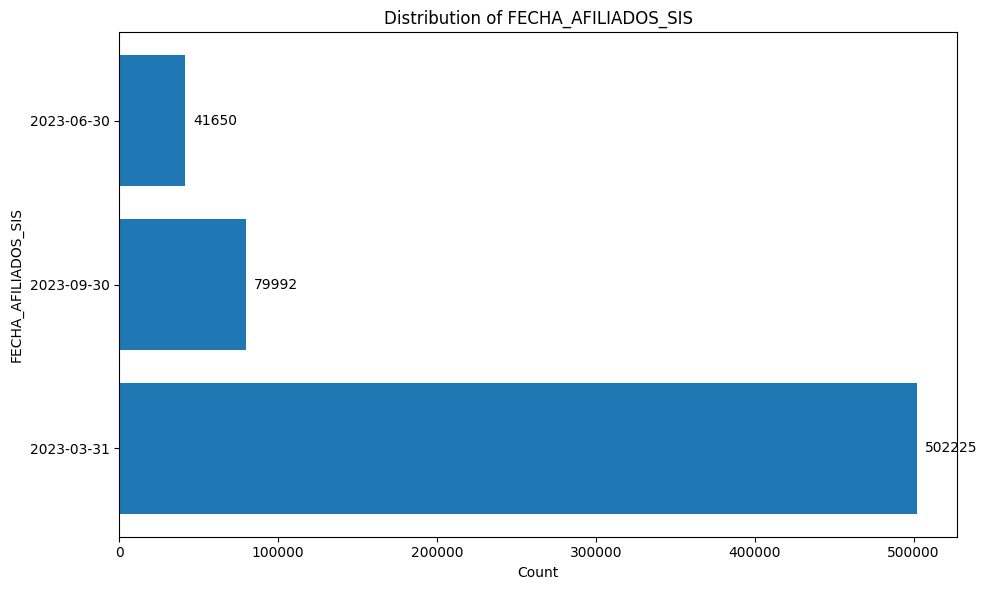


----------------------------------------

Skipping column 'CODIGO_ANONIMIZADO' due to high cardinality (623867 categories).
Skipping column 'DEPARTAMENTO' due to high cardinality (25 categories).
Skipping column 'PROVINCIA' due to high cardinality (196 categories).
Skipping column 'DISTRITO' due to high cardinality (1708 categories).


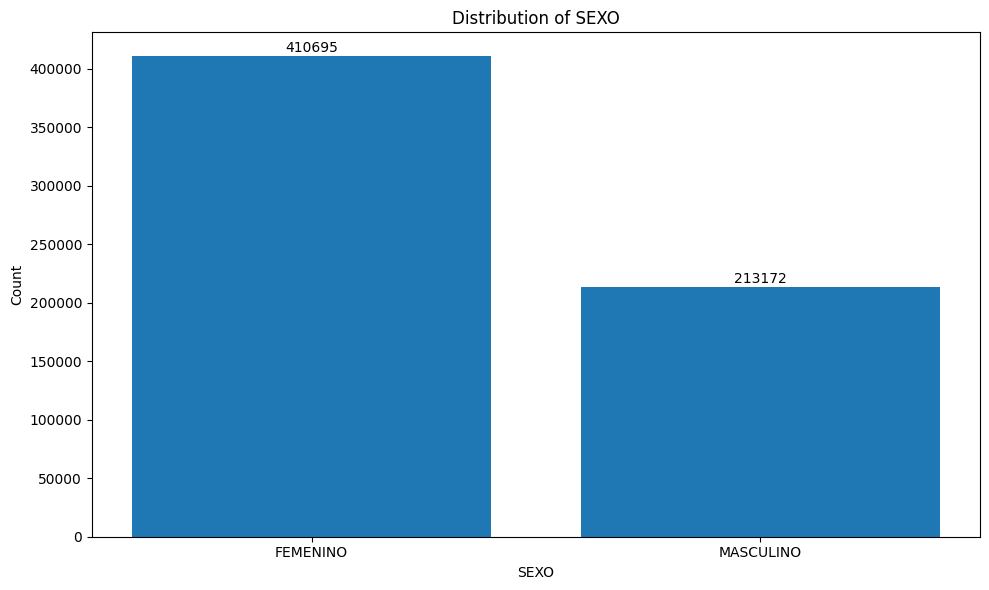


----------------------------------------

Skipping column 'FECHA_PRIMER_DX' due to high cardinality (2099 categories).


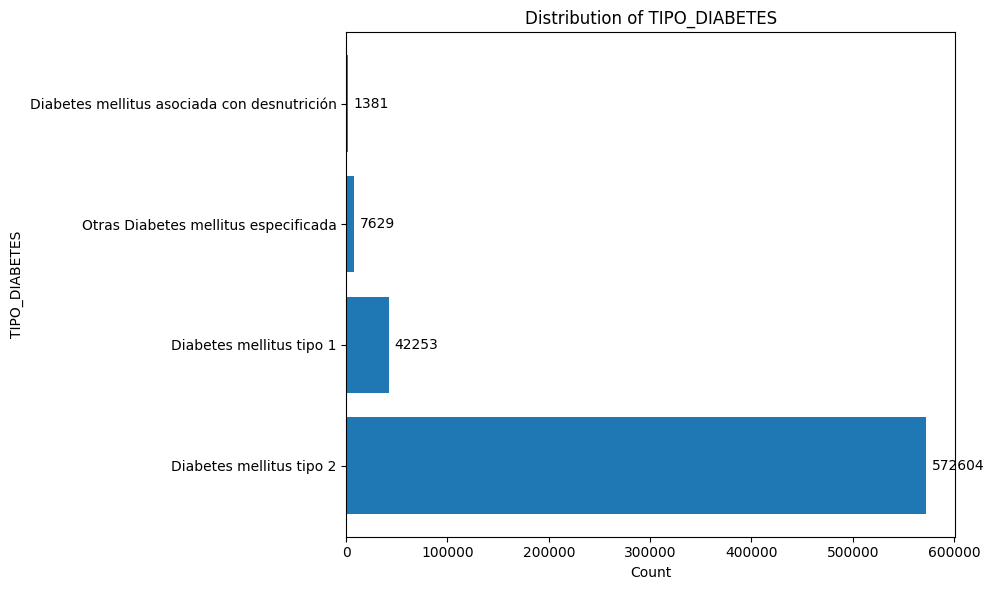


----------------------------------------

Skipping column 'UBICACION' due to high cardinality (1861 categories).


In [ ]:
plot_categorical_columns_topn(ds, categorical)

In [ ]:
numerical

Index(['EDAD', 'UBIGEO', 'CON_DX_OBESIDAD', 'CON_DX_HIPERTENSION',
       'CON_DX_SALUDMENTAL', 'CANT_ATENCIONES', 'VALOR_NETO',
       'CANT_ATENCIONES_HOSP', 'VALOR_NETO_HOSP', 'DIAS_HOSP', 'HOSPITALIZADO',
       'latitud', 'longitud', 'AÑO'],
      dtype='object')

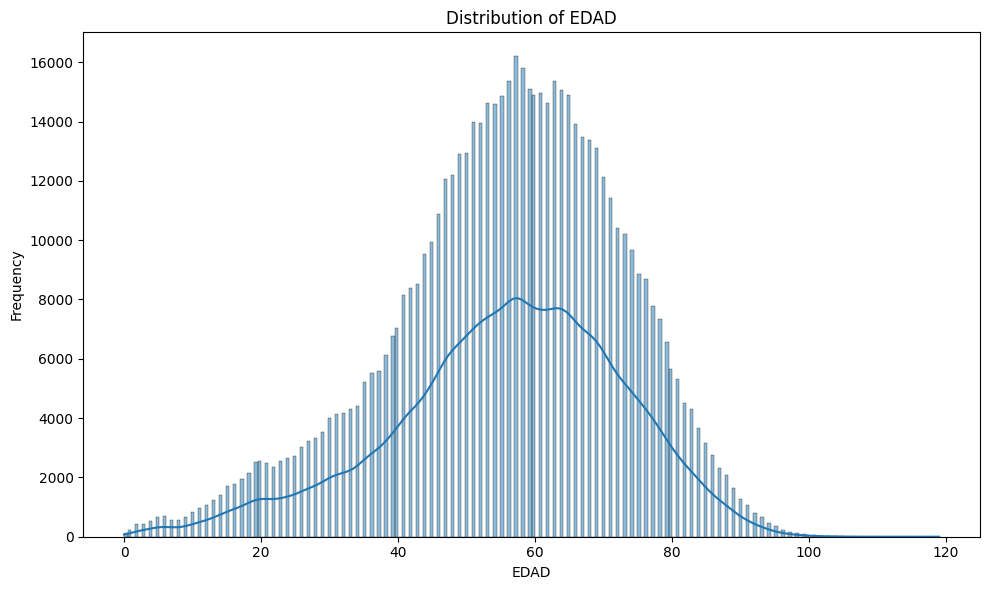

In [ ]:
plot_numerical_columns_histograma(ds, ['EDAD'])

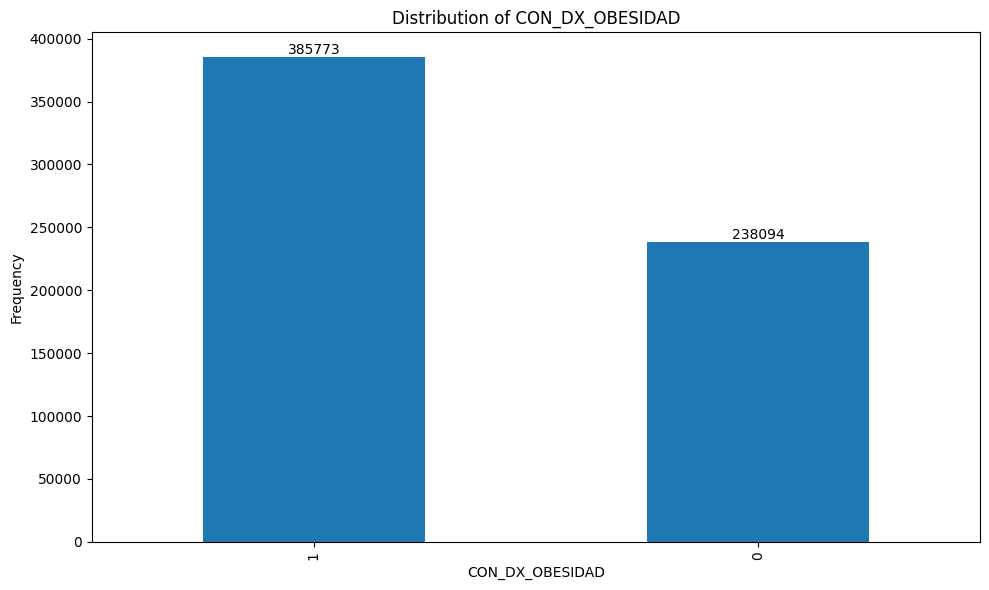

In [ ]:
plot_numerical_columns_vcount(ds, ['CON_DX_OBESIDAD'] )

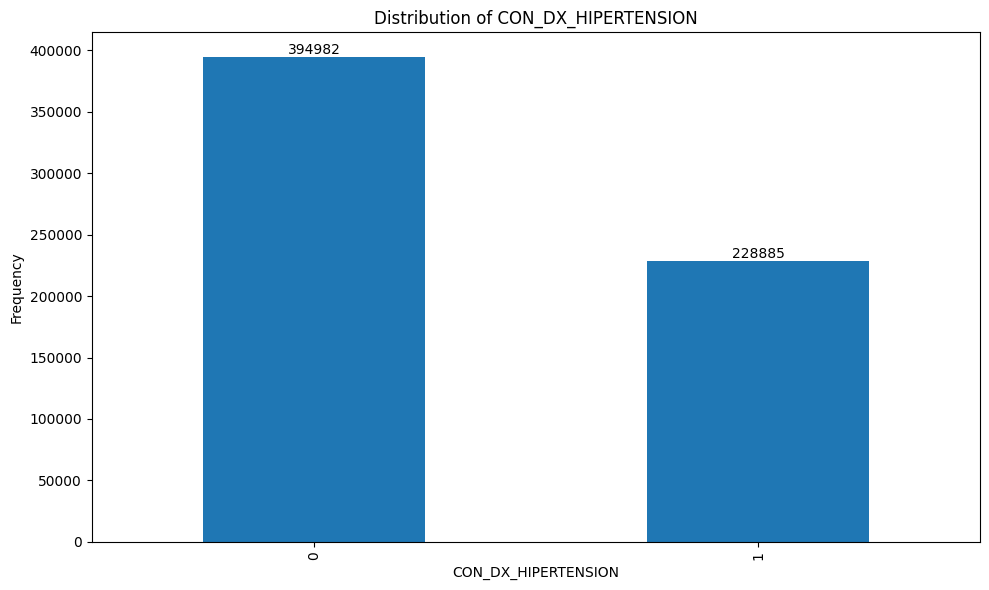

In [ ]:
 plot_numerical_columns_vcount(ds,['CON_DX_HIPERTENSION'])

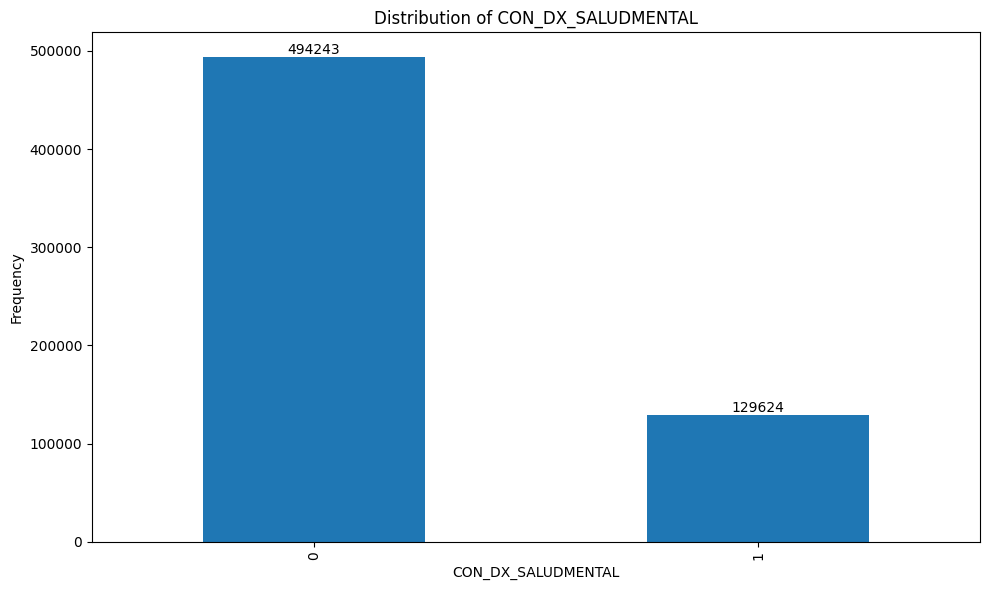

In [ ]:
plot_numerical_columns_vcount(ds,['CON_DX_SALUDMENTAL'])

In [ ]:
ds['VALOR_NETO_HOSP'].nunique()

15139

In [ ]:
valor_neto_hosp_sin_cero = ds[ds['VALOR_NETO_HOSP'] > 1]

In [ ]:
valor_neto_hosp_sin_cero['VALOR_NETO_HOSP'].describe()

,VALOR_NETO_HOSP
count,15454.00
mean,3058.42
std,6758.07
min,1.17
25%,679.06
50%,1370.16
75%,2909.76
max,232695.27


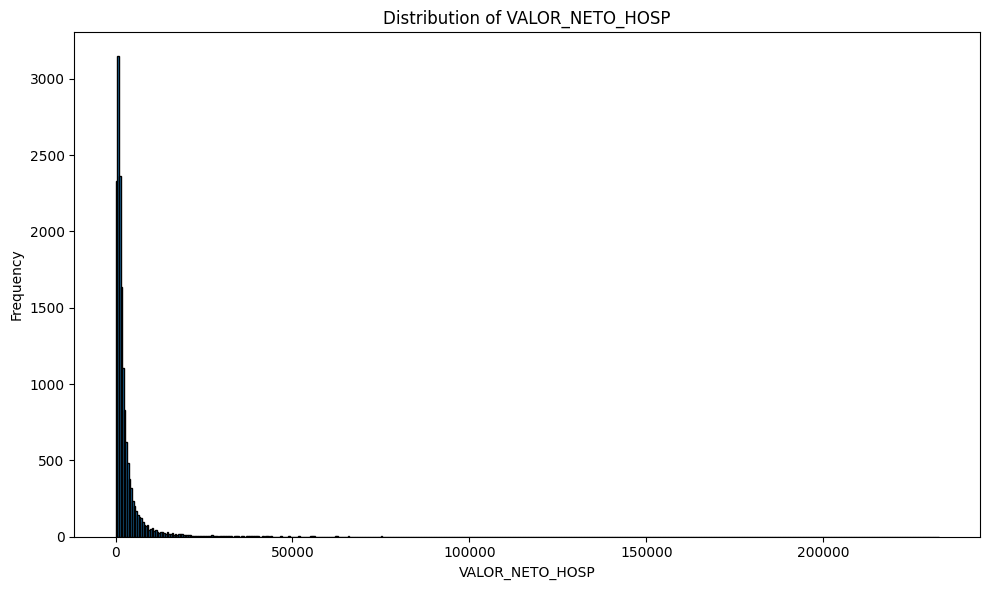

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(valor_neto_hosp_sin_cero['VALOR_NETO_HOSP'], bins=500, edgecolor='black')
plt.xlabel('VALOR_NETO_HOSP')
plt.ylabel('Frequency')
plt.title('Distribution of VALOR_NETO_HOSP')
plt.tight_layout()
plt.show()

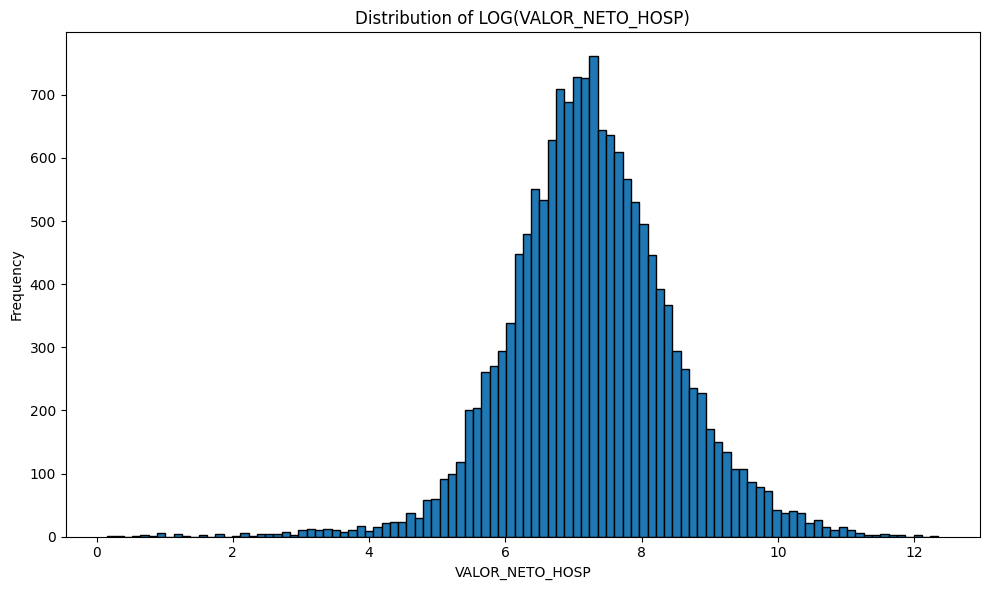

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(valor_neto_hosp_sin_cero['VALOR_NETO_HOSP']), bins=100, edgecolor='black')
plt.xlabel('VALOR_NETO_HOSP')
plt.ylabel('Frequency')
plt.title('Distribution of LOG(VALOR_NETO_HOSP)')
plt.tight_layout()
plt.show()

In [ ]:
ds['VALOR_NETO'].nunique()

40924

In [ ]:
valor_neto_sin_cero = ds[ds['VALOR_NETO'] > 1]

In [ ]:
valor_neto_sin_cero['VALOR_NETO'].describe()

,VALOR_NETO
count,171941.00
mean,335.13
std,2215.81
min,1.01
25%,5.40
50%,17.64
75%,107.71
max,232695.27


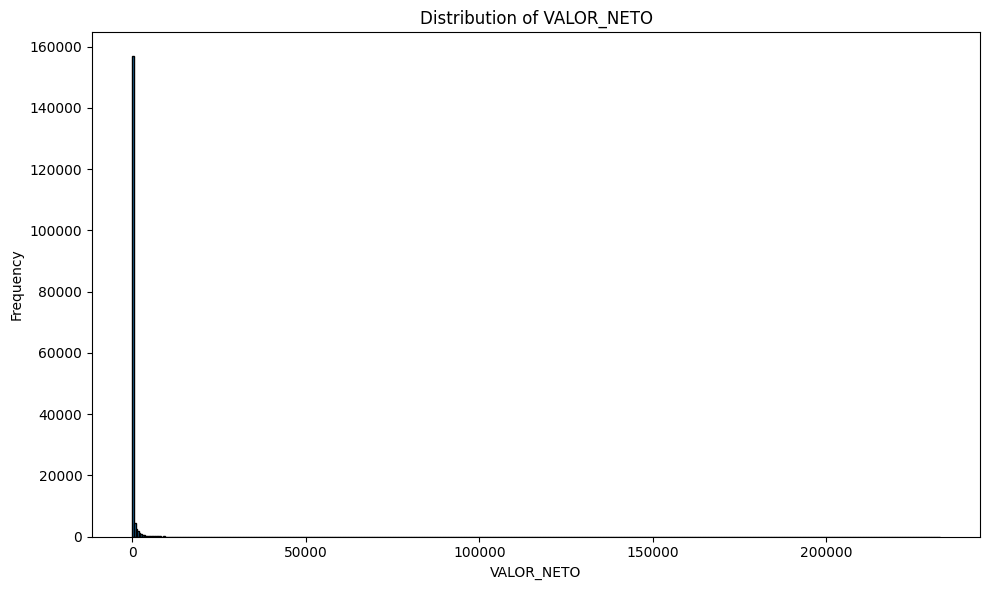

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(valor_neto_sin_cero['VALOR_NETO'], bins=500, edgecolor='black')
plt.xlabel('VALOR_NETO')
plt.ylabel('Frequency')
plt.title('Distribution of VALOR_NETO')
plt.tight_layout()
plt.show()

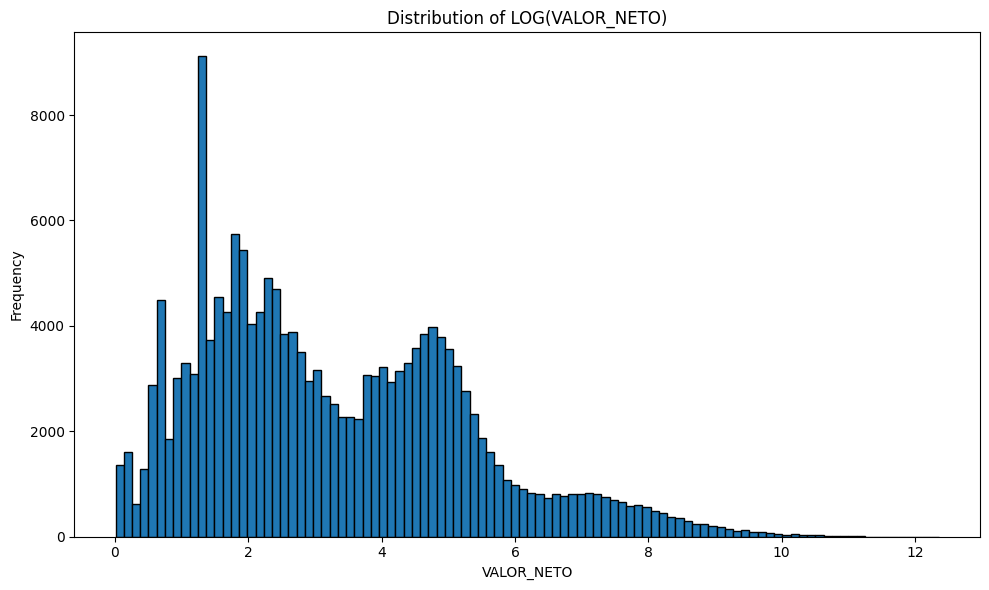

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(valor_neto_sin_cero['VALOR_NETO']), bins=100, edgecolor='black')
plt.xlabel('VALOR_NETO')
plt.ylabel('Frequency')
plt.title('Distribution of LOG(VALOR_NETO)')
plt.tight_layout()
plt.show()

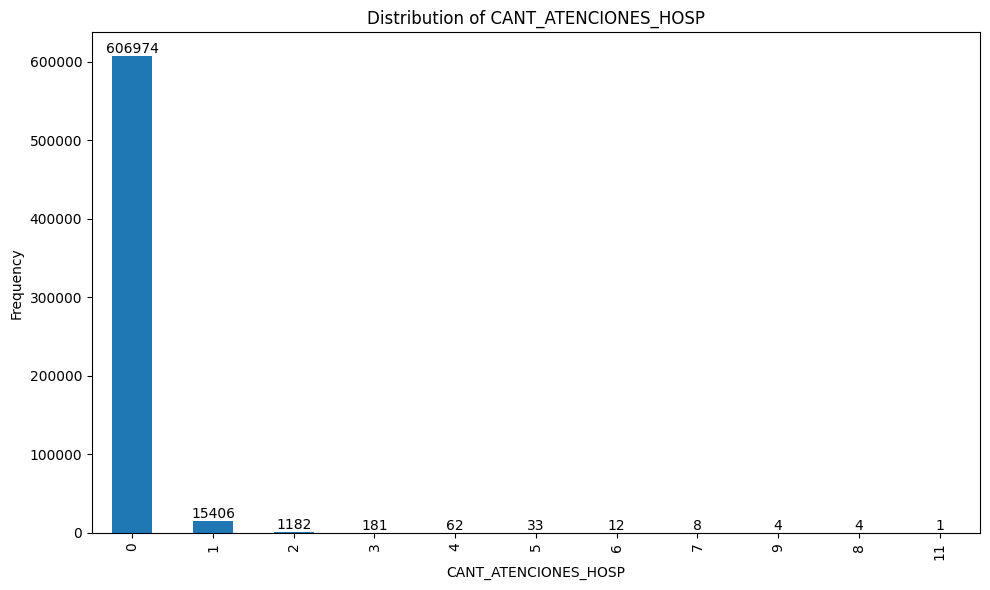

In [ ]:
plot_numerical_columns_vcount(ds,['CANT_ATENCIONES_HOSP'])

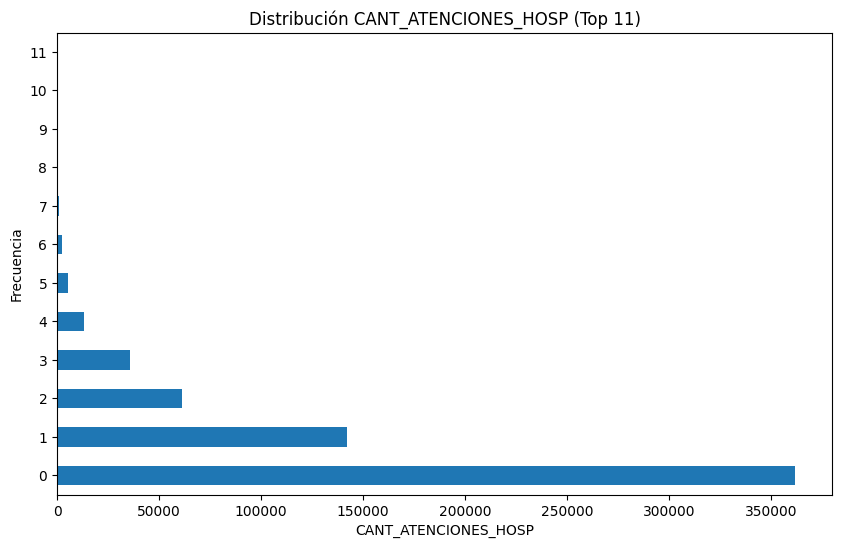

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))
# Calcular value counts y filtrar
value_counts = ds['CANT_ATENCIONES'].value_counts()
filtered_values = value_counts[:12]

# Filtrar el DataFrame original utilizando el índice de valores filtrados
filtered_ds = ds[ds['CANT_ATENCIONES'].isin(filtered_values.index)]

# Graficar el DataFrame filtrado
filtered_ds['CANT_ATENCIONES'].value_counts().plot(kind='barh', ax=ax)
plt.xlabel('CANT_ATENCIONES_HOSP')
plt.ylabel('Frecuencia')
plt.title('Distribución CANT_ATENCIONES_HOSP (Top 11)')
plt.show()

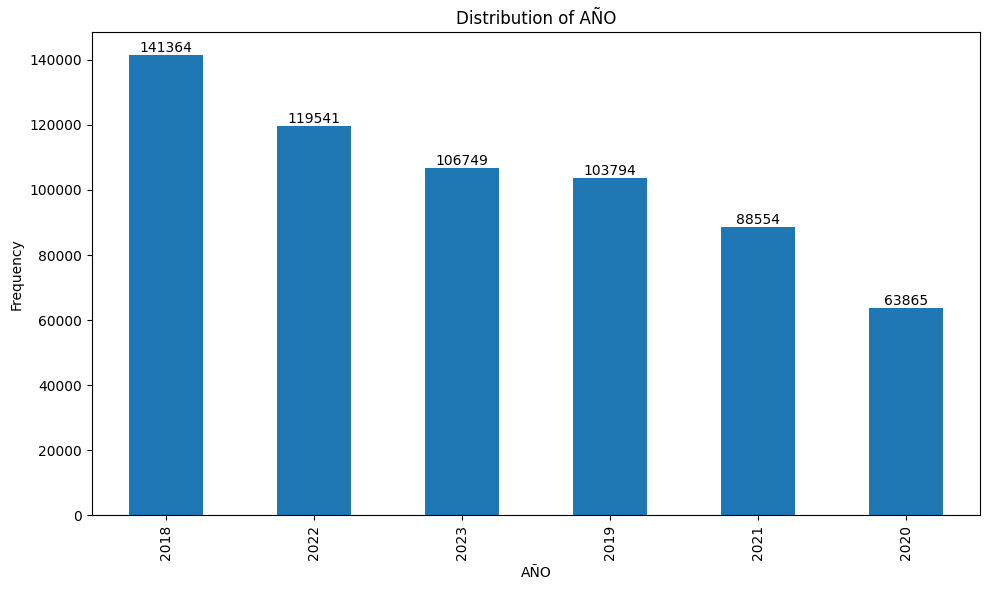

In [ ]:
plot_numerical_columns_vcount(ds,['AÑO'])

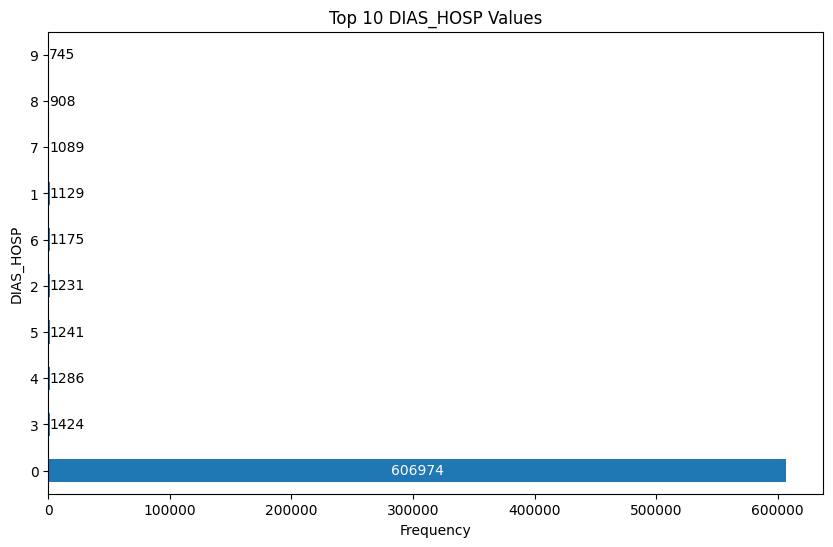

In [ ]:
# Calcular value counts y filtrar
cuenta_dias_hosp = ds['DIAS_HOSP'].value_counts()

# Obtener los 10 valores más frecuentes
top_10_values = cuenta_dias_hosp.nlargest(10)  # Use `10` instead of `9` to get top 10

# Filtrar el DataFrame original utilizando el índice de los 10 valores principales
filtered_ds = ds[ds['DIAS_HOSP'].isin(top_10_values.index)]

# Graficar el DataFrame filtrado
fig, ax = plt.subplots(figsize=(10, 6))
bars = filtered_ds['DIAS_HOSP'].value_counts().plot(kind='barh', ax=ax)

# Agregar etiquetas con valores a cada barra
for bar in ax.patches:
    # Obtener el ancho (valor) y la coordenada "y" de la barra
    value = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2

    # Si el valor es mayor a 600.000, colocar la etiqueta dentro de la barra
    if value > 600000:
        ax.text(value / 2, y, f'{int(value)}', ha='center', va='center', color='white')
    else:
        ax.text(value, y, f'{int(value)}', va='center')

plt.xlabel('Frequency')
plt.ylabel('DIAS_HOSP')
plt.title('Top 10 DIAS_HOSP Values')
plt.show()

In [ ]:
ds['DIAS_HOSP'].value_counts().head(20)

,count
DIAS_HOSP,
0,606974
3,1424
4,1286
5,1241
2,1231
6,1175
1,1129
7,1089
8,908


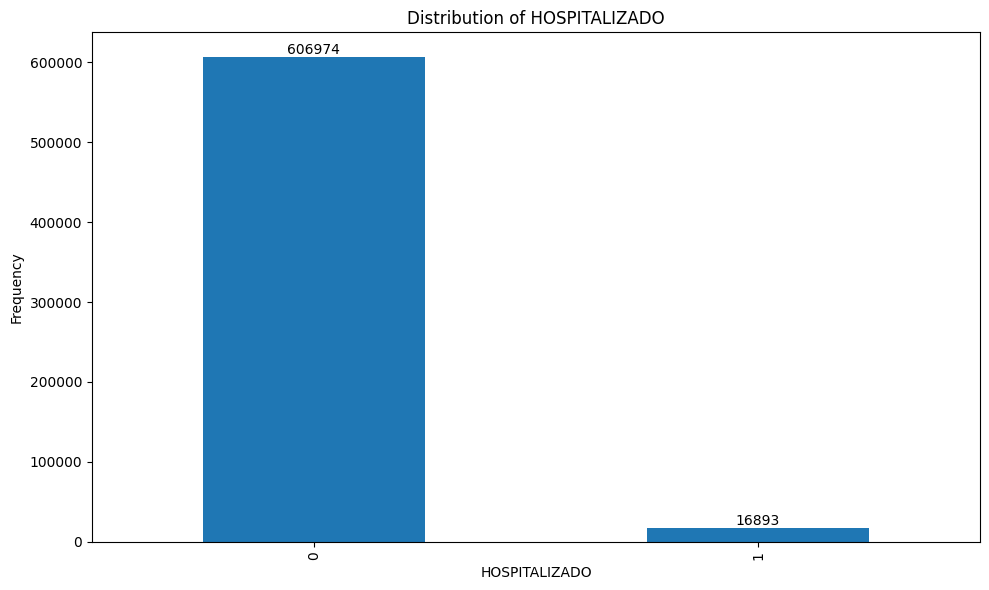

In [ ]:
plot_numerical_columns_vcount(ds,['HOSPITALIZADO'])

OBSERVACIONES:

'VALOR_NETO_HOSP' Y 'VALOR_NETO' con valores entre 0 y 1: 0.24, 0.66, etc.

Lo que es menor que uno MAPEARLO y dejarlo como CERO

Transformé 'VALOR_NETO_HOSP' Y 'VALOR_NETO' temporalmente para vizualizarlas de una forma parecida a una distribución normal, si se cambia a una nueva columna con log en caso de que no tenga CEROS, sino se usa otra variación de log

'LOG_VALOR_NETO_HOSP', 'LOG_VALOR_NETO', así a la hora de predecir se podrían tener mejores resultados, ya que la mayoría de los modelos asumen que hay una distribución normal

**ANÁLISIS BIVARIADO**

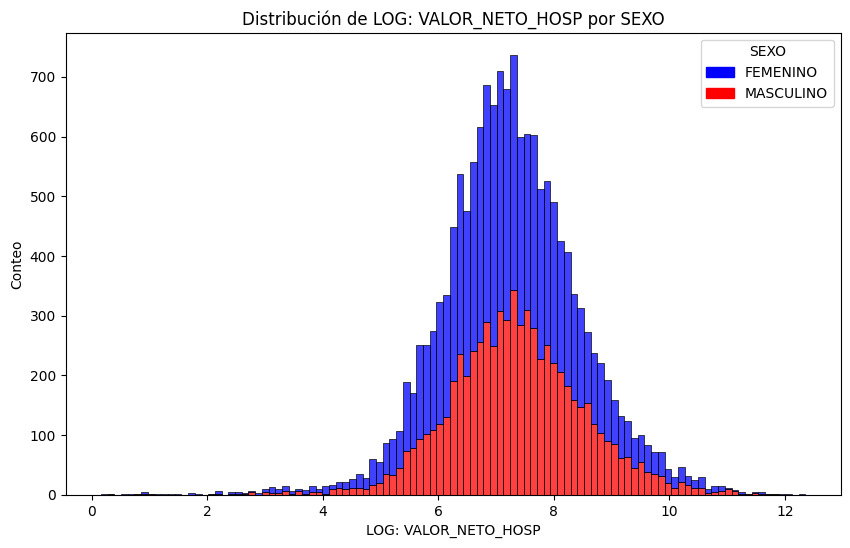

In [ ]:
variable = "VALOR_NETO_HOSP"
# Graficar el histograma con tono por género
plt.figure(figsize=(10, 6))
sns.histplot(data=valor_neto_hosp_sin_cero, x=np.log(valor_neto_hosp_sin_cero['VALOR_NETO_HOSP']), hue='SEXO', multiple='stack', palette={'FEMENINO': 'blue', 'MASCULINO': 'red'})

# Configurar el título y las etiquetas
plt.title(f'Distribución de LOG: {variable} por SEXO')
plt.xlabel(f"LOG: {variable}")
plt.ylabel('Conteo')

# Crear identificadores de leyenda personalizados
blue_patch = mpatches.Patch(color='blue', label='FEMENINO')
red_patch = mpatches.Patch(color='red', label='MASCULINO')

# Mostrar el gráfico con leyenda personalizada
plt.legend(handles=[blue_patch, red_patch], title='SEXO')
plt.show()

OBSERVACIONES:

Se graficó con la variable sin CEROS "valor_neto_hosp_sin_cero" y aplicada la función LOG para obtener datos entendibles

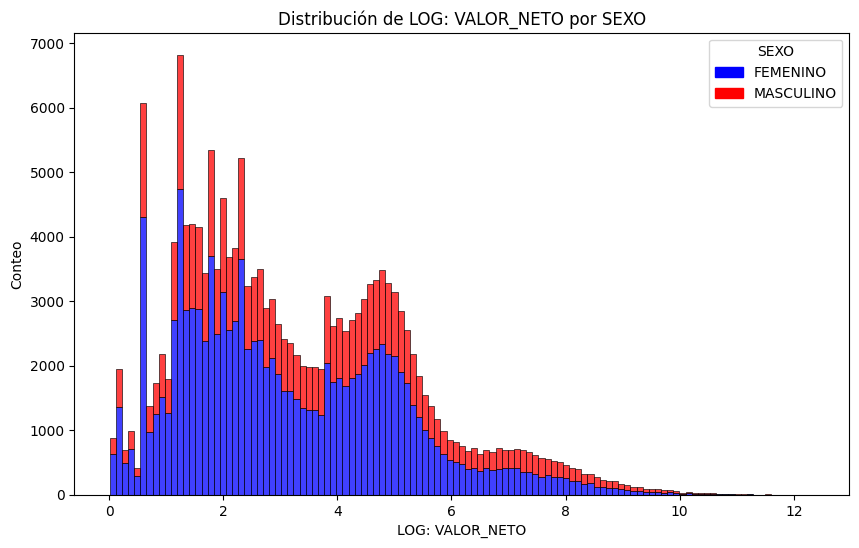

In [ ]:
variable = "VALOR_NETO"
# Graficar el histograma con tono por género
plt.figure(figsize=(10, 6))
sns.histplot(data=valor_neto_sin_cero, x=np.log(valor_neto_sin_cero['VALOR_NETO']), hue='SEXO', multiple='stack', palette={'FEMENINO': 'blue', 'MASCULINO': 'red'})

# Configurar el título y las etiquetas
plt.title(f'Distribución de LOG: {variable} por SEXO')
plt.xlabel(f"LOG: {variable}")
plt.ylabel('Conteo')

# Crear identificadores de leyenda personalizados
blue_patch = mpatches.Patch(color='blue', label='FEMENINO')
red_patch = mpatches.Patch(color='red', label='MASCULINO')

# Mostrar el gráfico con leyenda personalizada
plt.legend(handles=[blue_patch, red_patch], title='SEXO')
plt.show()

OBSERVACIONES:

Se graficó con la variable sin CEROS "valor_neto_sin_cero" y aplicada la función LOG para obtener datos entendibles

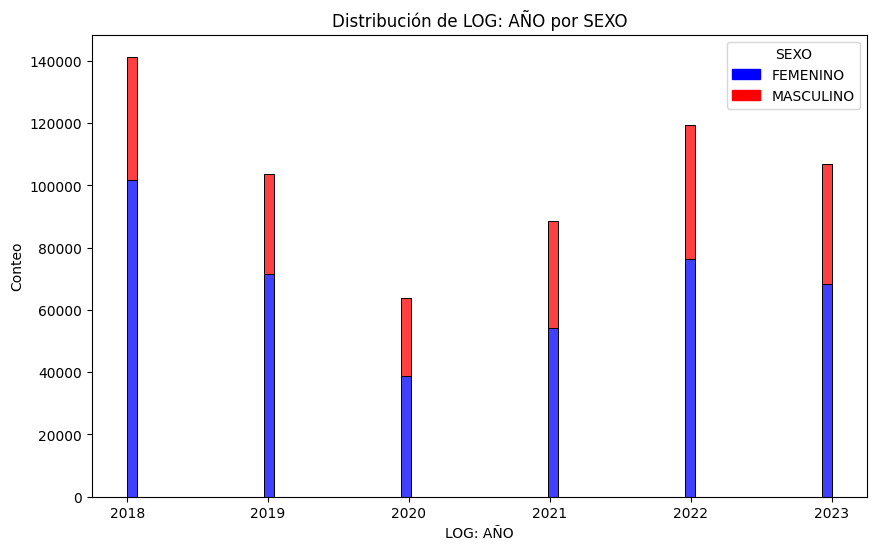

In [ ]:
variable = 'AÑO'
# Graficar el histograma con tono por género
plt.figure(figsize=(10, 6))
sns.histplot(data=ds, x='AÑO', hue='SEXO', multiple='stack', palette={'FEMENINO': 'blue', 'MASCULINO': 'red'})

# Configurar el título y las etiquetas
plt.title(f'Distribución de LOG: {variable} por SEXO')
plt.xlabel(f"LOG: {variable}")
plt.ylabel('Conteo')

# Crear identificadores de leyenda personalizados
blue_patch = mpatches.Patch(color='blue', label='FEMENINO')
red_patch = mpatches.Patch(color='red', label='MASCULINO')

# Mostrar el gráfico con leyenda personalizada
plt.legend(handles=[blue_patch, red_patch], title='SEXO')
plt.show()

In [ ]:
numerical

Index(['EDAD', 'UBIGEO', 'CON_DX_OBESIDAD', 'CON_DX_HIPERTENSION',
       'CON_DX_SALUDMENTAL', 'CANT_ATENCIONES', 'VALOR_NETO',
       'CANT_ATENCIONES_HOSP', 'VALOR_NETO_HOSP', 'DIAS_HOSP', 'HOSPITALIZADO',
       'latitud', 'longitud', 'AÑO'],
      dtype='object')

**HACER UN PAIR PLOT**

In [ ]:
# Tomar un subconjunto de las características del Set de Datos
numerical_short = ['VALOR_NETO_HOSP','EDAD','VALOR_NETO','CANT_ATENCIONES_HOSP','HOSPITALIZADO']


In [ ]:
# Definir el tamaño de la figura
#plt.figure(figsize=(6, 4))

#columns_to_plot = numerical_short
# Convert the 'Attrition_Flag' column to a string type
#sns.pairplot(ds[columns_to_plot], hue='HOSPITALIZADO',
#             hue_order=[0, 1])
#plt.tight_layout()
# Save the plot to a PNG file
#plt.savefig('pplot2.png', format='png', dpi=300)
#plt.show()

OBSERVACIONES:

Dejé toda esta celda comentada, porque estas líneas de código pueden tomar entre 10 a 20 minutos en ejecutarse

Guardé el resultado y subí la imagen

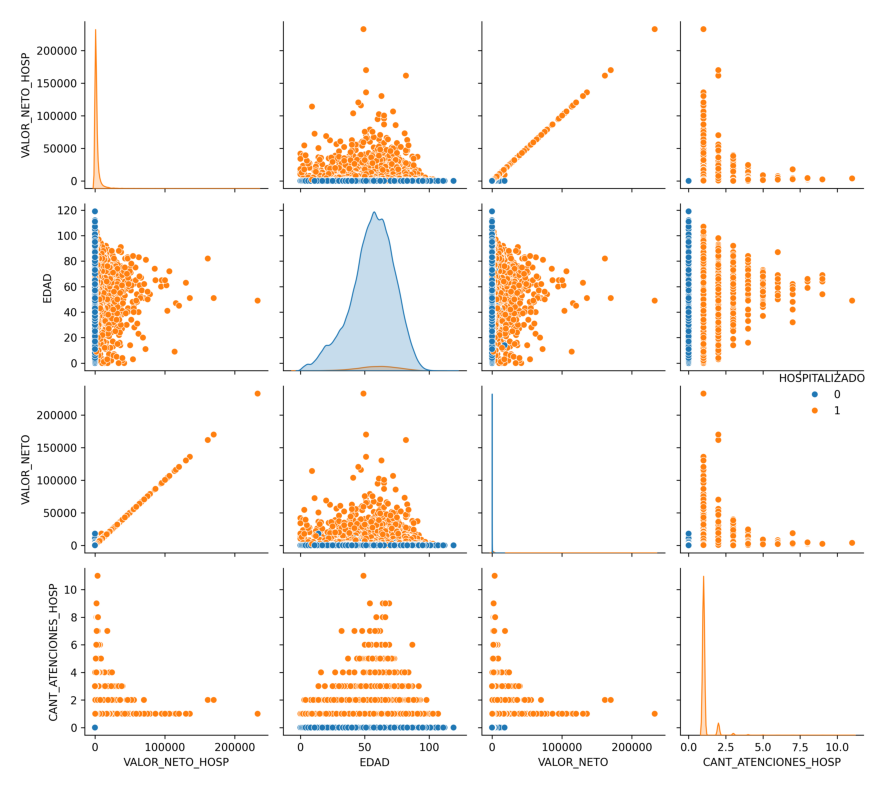

In [ ]:
# Cargar la imagen
img = mpimg.imread('pplot2.png')

# Crear una figura con el tamaño especificado
fig, ax = plt.subplots(figsize=(12, 8))

# Mostrar la imagen
ax.imshow(img)
ax.axis('off')  # Esconder ejes

# Ajustar el diseño para garantizar que se respete el tamaño de la figura.
plt.tight_layout()
plt.show()



---





---



CORRECCIÓN DE VALORES NETO MAYORES QUE CERO Y MENORES QUE 1

In [ ]:
ds[(ds['VALOR_NETO'] > 0) & (ds['VALOR_NETO'] < 1)]

,FECHA_AFILIADOS_SIS,CODIGO_ANONIMIZADO,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,FECHA_PRIMER_DX,TIPO_DIABETES,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,HOSPITALIZADO,UBICACION,latitud,longitud,AÑO
490,2023-03-31,00356C142A14956EA910AEE28EDA8DAEF94F76CD672CC9...,55,150110,LIMA,LIMA,COMAS,FEMENINO,2018-02-03,Diabetes mellitus tipo 2,1,1,0,5,0.96,0,0.00,0,0,LIMA-LIMA-COMAS,-11.96,-77.05,2018
918,2023-03-31,00611A1F2DAAE18E8C603B417EA699E00FCD409F6C9383...,63,130103,LA LIBERTAD,TRUJILLO,FLORENCIA DE MORA,FEMENINO,2023-03-01,Diabetes mellitus tipo 2,0,0,0,1,0.44,0,0.00,0,0,LA LIBERTAD-TRUJILLO-FLORENCIA DE MORA,-8.08,-79.02,2023
1384,2023-03-31,0094475C8381252F1761F8FCD10D786F115440A7E059A5...,66,150115,LIMA,LIMA,LA VICTORIA,FEMENINO,2022-12-28,Diabetes mellitus tipo 2,1,1,1,1,0.60,0,0.00,0,0,LIMA-LIMA-LA VICTORIA,-12.06,-77.03,2022
1446,2023-03-31,009BC1086BFF733C66A4631D353299E866FFE278C9B414...,46,130809,LA LIBERTAD,PATAZ,PATAZ,MASCULINO,2018-01-06,Diabetes mellitus tipo 2,1,1,0,1,0.81,0,0.00,0,0,LA LIBERTAD-PATAZ-PATAZ,-7.79,-77.59,2018
1930,2023-03-31,00CA8CF96DEAB5E86BA148F783F422274EFC572784039E...,69,120132,JUNIN,HUANCAYO,SAÑO,FEMENINO,2018-01-09,Diabetes mellitus tipo 1,1,1,0,1,0.04,0,0.00,0,0,JUNIN-HUANCAYO-SAÑO,-11.96,-75.26,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621568,2023-03-31,FF0CB4DAAECC8638F466E1CD4F1E39ACEEEEAC4640E4CB...,85,20101,ANCASH,HUARAZ,HUARAZ,FEMENINO,2022-12-20,Diabetes mellitus tipo 2,1,1,1,2,0.90,0,0.00,0,0,ANCASH-HUARAZ-HUARAZ,-9.53,-77.53,2022
621690,2023-03-31,FF1A135F1EBE99036D2D8FDE00333F5D772C4B08104242...,62,130105,LA LIBERTAD,TRUJILLO,LA ESPERANZA,FEMENINO,2023-02-20,Diabetes mellitus tipo 2,1,0,0,1,0.81,0,0.00,0,0,LA LIBERTAD-TRUJILLO-LA ESPERANZA,-8.06,-79.05,2023
622890,2023-06-30,FF96ACDDB0A6B4B170C38D0162F92B88AF33CCB5397230...,45,21801,ANCASH,SANTA,CHIMBOTE,MASCULINO,2023-05-04,Diabetes mellitus tipo 2,1,0,0,1,0.90,0,0.00,0,0,ANCASH-SANTA-CHIMBOTE,-9.04,-78.61,2023
622892,2023-06-30,FF96D9F3D4764D9792616978270AAB5970D3D8B7478F98...,44,160104,LORETO,MAYNAS,INDIANA,FEMENINO,2023-05-05,Diabetes mellitus tipo 2,0,1,0,1,0.72,0,0.00,0,0,LORETO-MAYNAS-INDIANA,-3.50,-73.04,2023


In [ ]:
ds[ds['VALOR_NETO'] == 0].count()

,0
FECHA_AFILIADOS_SIS,450291
CODIGO_ANONIMIZADO,450291
EDAD,450291
UBIGEO,450291
DEPARTAMENTO,450291
PROVINCIA,450291
DISTRITO,450291
SEXO,450291
FECHA_PRIMER_DX,450291
TIPO_DIABETES,450291


In [ ]:
ds[(ds['VALOR_NETO'] > 0) & (ds['VALOR_NETO'] < 1)].count()

,0
FECHA_AFILIADOS_SIS,1616
CODIGO_ANONIMIZADO,1616
EDAD,1616
UBIGEO,1616
DEPARTAMENTO,1616
PROVINCIA,1616
DISTRITO,1616
SEXO,1616
FECHA_PRIMER_DX,1616
TIPO_DIABETES,1616


VALORES MAYORES QUE CERO Y MENORES QUE 1 EN VALOR_NETO_HOSP

In [ ]:
ds[(ds['VALOR_NETO_HOSP'] > 0) & (ds['VALOR_NETO_HOSP'] < 1)].count()

,0
FECHA_AFILIADOS_SIS,5
CODIGO_ANONIMIZADO,5
EDAD,5
UBIGEO,5
DEPARTAMENTO,5
PROVINCIA,5
DISTRITO,5
SEXO,5
FECHA_PRIMER_DX,5
TIPO_DIABETES,5


In [ ]:
ds['VALOR_NETO'] = np.where(ds['VALOR_NETO'] < 1, 0, ds['VALOR_NETO'])

In [ ]:
ds[(ds['VALOR_NETO'] > 0) & (ds['VALOR_NETO'] < 1)].count()

,0
FECHA_AFILIADOS_SIS,0
CODIGO_ANONIMIZADO,0
EDAD,0
UBIGEO,0
DEPARTAMENTO,0
PROVINCIA,0
DISTRITO,0
SEXO,0
FECHA_PRIMER_DX,0
TIPO_DIABETES,0


In [ ]:
ds[ds['VALOR_NETO'] == 0].count()

,0
FECHA_AFILIADOS_SIS,451907
CODIGO_ANONIMIZADO,451907
EDAD,451907
UBIGEO,451907
DEPARTAMENTO,451907
PROVINCIA,451907
DISTRITO,451907
SEXO,451907
FECHA_PRIMER_DX,451907
TIPO_DIABETES,451907


In [ ]:
print(f"VALOR_NETO: VALORES CERO: {450291}, VALOR_NETO VALORES MAYOR QUE CERO, MENOR QUE 1: {1616}\nLuego de MAPEAR VALORES\nTOTAL: {450291 + 1616}")

VALOR_NETO: VALORES CERO: 450291, VALOR_NETO VALORES MAYOR QUE CERO, MENOR QUE 1: 1616
Luego de MAPEAR VALORES
TOTAL: 451907


In [ ]:
ds['VALOR_NETO_HOSP'] = np.where(ds['VALOR_NETO_HOSP'] < 1, 0, ds['VALOR_NETO_HOSP'])

In [ ]:
ds[(ds['VALOR_NETO_HOSP'] > 0) & (ds['VALOR_NETO_HOSP'] < 1)]['VALOR_NETO_HOSP'].count()

0

In [ ]:
ds.shape

(623867, 23)

In [ ]:
ds['LOG1P_VALOR_NETO'] = np.log1p(ds['VALOR_NETO'])

In [ ]:
ds['LOG1P_VALOR_NETO_HOSP'] = np.log1p(ds['VALOR_NETO_HOSP'])

OBSERVACIONES:

Crear esas 2 nuevas columnas ayuda a mejorar el desempeño del modelo, cabe mencionar que a la hora de graficar la distribución de ve obscurecida por la gran cantidad de ceros en las 2 columnas

# FEATURE SELECTION

In [ ]:
caracteristicas_importantes = ds.copy()

In [ ]:
caracteristicas_importantes = dummies(caracteristicas_importantes,'TIPO_DIABETES')
caracteristicas_importantes

,FECHA_AFILIADOS_SIS,CODIGO_ANONIMIZADO,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,FECHA_PRIMER_DX,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,HOSPITALIZADO,UBICACION,latitud,longitud,AÑO,LOG1P_VALOR_NETO,LOG1P_VALOR_NETO_HOSP,Diabetes mellitus asociada con desnutrición,Diabetes mellitus tipo 1,Diabetes mellitus tipo 2,Otras Diabetes mellitus especificada
0,2023-09-30,000015CA7003D37272A17DE250F6AFE9339F487360EC50...,75,70101,CALLAO,CALLAO,CALLAO,MASCULINO,2018-01-05,1,1,0,1,6.60,0,0.00,0,0,CALLAO-CALLAO-CALLAO,-12.06,-77.15,2018,2.03,0.00,False,False,True,False
1,2023-03-31,0000249BA42728EB9AF192293384E60E78449CE1DDA27A...,62,110106,ICA,ICA,PARCONA,MASCULINO,2018-08-09,0,0,0,0,0.00,0,0.00,0,0,ICA-ICA-PARCONA,-14.05,-75.69,2018,0.00,0.00,False,False,True,False
2,2023-09-30,000031B49CE1B8437CF896A1D20A1E7A5048DE00952634...,55,40112,AREQUIPA,AREQUIPA,PAUCARPATA,FEMENINO,2018-02-09,0,1,1,5,53.67,0,0.00,0,0,AREQUIPA-AREQUIPA-PAUCARPATA,-16.43,-71.50,2018,4.00,0.00,False,False,True,False
3,2023-03-31,000088EB332F5E7B13C522719F24EDC16A12FC1245B405...,56,150125,LIMA,LIMA,PUENTE PIEDRA,FEMENINO,2023-01-17,1,0,0,2,0.00,0,0.00,0,0,LIMA-LIMA-PUENTE PIEDRA,-11.87,-77.08,2023,0.00,0.00,False,False,True,False
4,2023-03-31,0000AD2FC5F5176DF573CE912D47FB0E1AF58917E81C64...,78,60101,CAJAMARCA,CAJAMARCA,CAJAMARCA,FEMENINO,2021-11-26,0,0,0,0,0.00,0,0.00,0,0,CAJAMARCA-CAJAMARCA-CAJAMARCA,-7.15,-78.51,2021,0.00,0.00,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623862,2023-03-31,FFFFA47678C29BE92DE6E3B13D384C6CE8F5B86A370D07...,51,150143,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,FEMENINO,2022-02-07,1,1,0,0,0.00,0,0.00,0,0,LIMA-LIMA-VILLA MARIA DEL TRIUNFO,-12.16,-76.94,2022,0.00,0.00,False,False,True,False
623863,2023-03-31,FFFFA6E5D2DBCA789A55A95FF83500397C803202C34EB7...,95,230101,TACNA,TACNA,TACNA,FEMENINO,2022-03-09,0,1,0,0,0.00,0,0.00,0,0,TACNA-TACNA-TACNA,-18.00,-70.25,2022,0.00,0.00,False,False,True,False
623864,2023-03-31,FFFFB321B03B29A378EF88FFCB09E58686FCC2C2D7352D...,25,130601,LA LIBERTAD,OTUZCO,OTUZCO,FEMENINO,2019-08-15,0,0,0,0,0.00,0,0.00,0,0,LA LIBERTAD-OTUZCO-OTUZCO,-7.90,-78.57,2019,0.00,0.00,False,False,True,False
623865,2023-03-31,FFFFD29076B4CA13B419F61C7DE7EA23739A5D231A1B4B...,43,150117,LIMA,LIMA,LOS OLIVOS,FEMENINO,2021-04-28,0,0,0,0,0.00,0,0.00,0,0,LIMA-LIMA-LOS OLIVOS,-11.99,-77.07,2021,0.00,0.00,False,True,False,False


In [ ]:
# Cambiar nombres de forma individual
caracteristicas_importantes = caracteristicas_importantes.rename(columns={'Diabetes mellitus asociada con desnutrición': 'D_a_desn','Diabetes mellitus tipo 1': 'D_t1','Diabetes mellitus tipo 2': 'D_t2', 'Otras Diabetes mellitus especificada': 'Otras_D_no_esp'})

In [ ]:
 # Transformarlas a enteros
caracteristicas_importantes[['D_a_desn', 'D_t1', 'D_t2', 'Otras_D_no_esp']] = caracteristicas_importantes[['D_a_desn', 'D_t1', 'D_t2', 'Otras_D_no_esp']].astype(int)

In [ ]:
caracteristicas_importantes = caracteristicas_importantes.drop(columns=['FECHA_AFILIADOS_SIS', 'CODIGO_ANONIMIZADO', 'FECHA_PRIMER_DX'])

In [ ]:
caracteristicas_importantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623867 entries, 0 to 623866
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   EDAD                   623867 non-null  int64  
 1   UBIGEO                 623867 non-null  int64  
 2   DEPARTAMENTO           623867 non-null  object 
 3   PROVINCIA              623867 non-null  object 
 4   DISTRITO               623867 non-null  object 
 5   SEXO                   623867 non-null  object 
 6   CON_DX_OBESIDAD        623867 non-null  int64  
 7   CON_DX_HIPERTENSION    623867 non-null  int64  
 8   CON_DX_SALUDMENTAL     623867 non-null  int64  
 9   CANT_ATENCIONES        623867 non-null  int64  
 10  VALOR_NETO             623867 non-null  float64
 11  CANT_ATENCIONES_HOSP   623867 non-null  int64  
 12  VALOR_NETO_HOSP        623867 non-null  float64
 13  DIAS_HOSP              623867 non-null  int64  
 14  HOSPITALIZADO          623867 non-nu

In [ ]:
caracteristicas_importantes['DISTRITO'].nunique()

1708

In [ ]:
caracteristicas_importantes['DEPARTAMENTO'].nunique()

25

In [ ]:
caracteristicas_importantes['PROVINCIA'].nunique()

196

In [ ]:
caracteristicas_importantes['UBICACION'].nunique()

1861

In [ ]:
# Inicializar LabelEncoder
label_encoder = LabelEncoder()

# Aplicar label encoding
caracteristicas_importantes['DEPARTAMENTO'] = label_encoder.fit_transform(caracteristicas_importantes['DEPARTAMENTO'])
caracteristicas_importantes['PROVINCIA'] = label_encoder.fit_transform(caracteristicas_importantes['PROVINCIA'])
caracteristicas_importantes['DISTRITO'] = label_encoder.fit_transform(caracteristicas_importantes['DISTRITO'])
caracteristicas_importantes['UBICACION'] = label_encoder.fit_transform(caracteristicas_importantes['UBICACION'])

In [ ]:
caracteristicas_importantes = dummies(caracteristicas_importantes,'SEXO')

In [ ]:
 # Transformarlas a enteros
caracteristicas_importantes[['FEMENINO', 'MASCULINO']] = caracteristicas_importantes[['FEMENINO', 'MASCULINO']].astype(int)

In [ ]:
caracteristicas_importantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623867 entries, 0 to 623866
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   EDAD                   623867 non-null  int64  
 1   UBIGEO                 623867 non-null  int64  
 2   DEPARTAMENTO           623867 non-null  int64  
 3   PROVINCIA              623867 non-null  int64  
 4   DISTRITO               623867 non-null  int64  
 5   CON_DX_OBESIDAD        623867 non-null  int64  
 6   CON_DX_HIPERTENSION    623867 non-null  int64  
 7   CON_DX_SALUDMENTAL     623867 non-null  int64  
 8   CANT_ATENCIONES        623867 non-null  int64  
 9   VALOR_NETO             623867 non-null  float64
 10  CANT_ATENCIONES_HOSP   623867 non-null  int64  
 11  VALOR_NETO_HOSP        623867 non-null  float64
 12  DIAS_HOSP              623867 non-null  int64  
 13  HOSPITALIZADO          623867 non-null  int64  
 14  UBICACION              623867 non-nu

SELECCIÓN DE CARACTERÍSTICAS (COLUMNAS) POR CORRELACIÓN

In [ ]:
caracteristicas_importantes.corr()

,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,HOSPITALIZADO,UBICACION,latitud,longitud,AÑO,LOG1P_VALOR_NETO,LOG1P_VALOR_NETO_HOSP,D_a_desn,D_t1,D_t2,Otras_D_no_esp,FEMENINO,MASCULINO
EDAD,1.00,-0.04,-0.04,-0.00,0.01,0.11,0.39,0.04,0.10,0.01,0.03,0.01,0.02,0.03,-0.04,-0.01,0.02,-0.14,0.10,0.03,-0.00,-0.03,0.03,-0.02,-0.01,0.01
UBIGEO,-0.04,1.00,1.00,0.37,0.15,-0.03,0.01,-0.03,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,0.98,0.29,-0.11,-0.01,-0.02,-0.00,0.00,-0.01,0.01,-0.02,-0.01,0.01
DEPARTAMENTO,-0.04,1.00,1.00,0.37,0.15,-0.03,0.01,-0.03,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,0.98,0.29,-0.11,-0.01,-0.02,-0.00,0.00,-0.01,0.01,-0.02,-0.01,0.01
PROVINCIA,-0.00,0.37,0.37,1.00,0.18,0.01,0.01,-0.02,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.40,0.26,-0.19,-0.00,-0.02,-0.00,0.00,-0.01,0.01,-0.00,-0.00,0.00
DISTRITO,0.01,0.15,0.15,0.18,1.00,-0.01,0.00,-0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.18,0.01,0.02,-0.00,0.01,0.01,0.01,-0.00,0.00,-0.00,-0.00,0.00
CON_DX_OBESIDAD,0.11,-0.03,-0.03,0.01,-0.01,1.00,0.15,0.13,0.14,-0.02,-0.05,-0.03,-0.04,-0.05,-0.03,-0.03,-0.03,-0.15,0.06,-0.06,-0.01,-0.05,0.05,-0.01,0.15,-0.15
CON_DX_HIPERTENSION,0.39,0.01,0.01,0.01,0.00,0.15,1.00,0.13,0.13,0.04,0.06,0.03,0.04,0.06,0.01,0.05,-0.03,-0.11,0.16,0.07,0.00,0.01,-0.01,-0.01,0.03,-0.03
CON_DX_SALUDMENTAL,0.04,-0.03,-0.03,-0.02,-0.02,0.13,0.13,1.00,0.06,0.02,0.02,0.01,0.02,0.02,-0.02,-0.07,0.01,-0.09,0.08,0.02,0.01,0.01,-0.02,0.00,0.08,-0.08
CANT_ATENCIONES,0.10,-0.00,-0.00,-0.00,0.01,0.14,0.13,0.06,1.00,0.08,0.20,0.06,0.10,0.18,-0.01,-0.00,0.03,0.08,0.57,0.17,0.00,0.00,-0.01,0.01,0.03,-0.03
VALOR_NETO,0.01,-0.00,-0.00,0.00,0.00,-0.02,0.04,0.02,0.08,1.00,0.38,1.00,0.60,0.39,-0.00,-0.02,0.01,0.05,0.32,0.50,0.02,0.03,-0.04,0.01,-0.02,0.02


APLICAR TEST DE HIPOTÉSIS A EDAD VS HIPERTENSIÓN

In [ ]:
# Calcular el coeficiente de correlación de Pearson y el valor p

"""
Hipótesis nula (H0): No existe correlación entre edad e hipertensión (r = 0)
Hipótesis alternativa (H1): Existe correlación entre edad e hipertensión (r ≠ 0)

Con α = 0.05 (nivel de significancia):

Si p-value < 0.05: Rechazamos H0, lo que significa que hay evidencia estadística de correlación entre edad e hipertensión
"""

correlation_coefficient, p_value = stats.pearsonr(caracteristicas_importantes['EDAD'], caracteristicas_importantes['CON_DX_HIPERTENSION'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.3880929401899096
P-value: 0.0


OBSERVACIONES:

El test de hipotésis realizado indica una correlación estadísticamente significativa entre la edad y la presión arterial alta, lo que sugiere una posible relación.

Sin embargo, es esencial considerar otros factores que pueden influir en esta relación y realizar más análisis para extraer conclusiones más fiables sobre la causalidad. Al investigar los factores de confusión y utilizar modelos estadísticos más complejos, puede obtener conocimientos más profundos sobre la dinámica entre la edad y la presión arterial alta.



---





---



CREAR MAPA DE CALOR DE CORRELACIONES

In [ ]:
# Calcular la matriz de correlación y extraer correlaciones con 'HOSPITALIZADO'
corr_matrix = caracteristicas_importantes.corr()
corr_without_target = corr_matrix['HOSPITALIZADO'].drop('HOSPITALIZADO')  # Exclude the target itself

# Ordenar las correlaciones en orden descendente
sorted_corr = corr_without_target.sort_values(ascending=False)

# Seleccionar las 9 características positivas y las 9 negativas más importantes
top_caracteristicas_positivas = sorted_corr.head(9).index.tolist()
top_caracteristicas_negativas = sorted_corr.tail(9).index.tolist()
selected_features2 = top_caracteristicas_positivas + top_caracteristicas_negativas

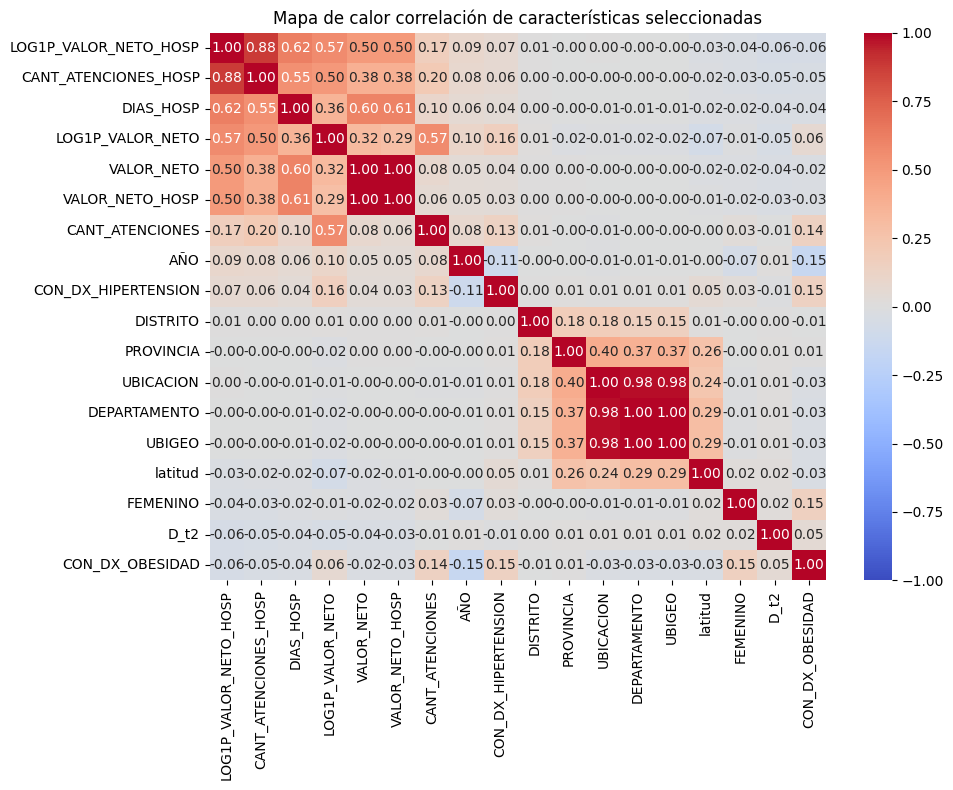

In [ ]:
# Crear una nueva matriz de correlación utilizando las características seleccionadas
corr_matrix_selected = caracteristicas_importantes[selected_features2].corr()

# Crer un mapa de calor usando seaborn
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_selected, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor correlación de características seleccionadas')
plt.tight_layout()
plt.show()



---





---



GRAFICAR TOP 6 CORRELACIONES NEGATIVAS Y POSITIVAS

In [ ]:
# Calcular la matriz de correlación y extraer correlaciones con 'HOSPITALIZADO'
corr_matrix = caracteristicas_importantes.corr()
corr_without_target = corr_matrix['HOSPITALIZADO'].drop('HOSPITALIZADO')  # Exclude the target itself

# Ordenar las correlaciones en orden descendente
sorted_corr = corr_without_target.sort_values(ascending=False)

# Seleccionar las 6 características positivas y las 6 negativas más importantes
top_positive_features = sorted_corr.head(6).index.tolist()
top_negative_features = sorted_corr.tail(6).index.tolist()
selected_features = top_positive_features + top_negative_features

# Opcional: Mostrar las características seleccionadas
#print("Top Positive Features:", top_positive_features)
#print("Top Negative Features:", top_negative_features)

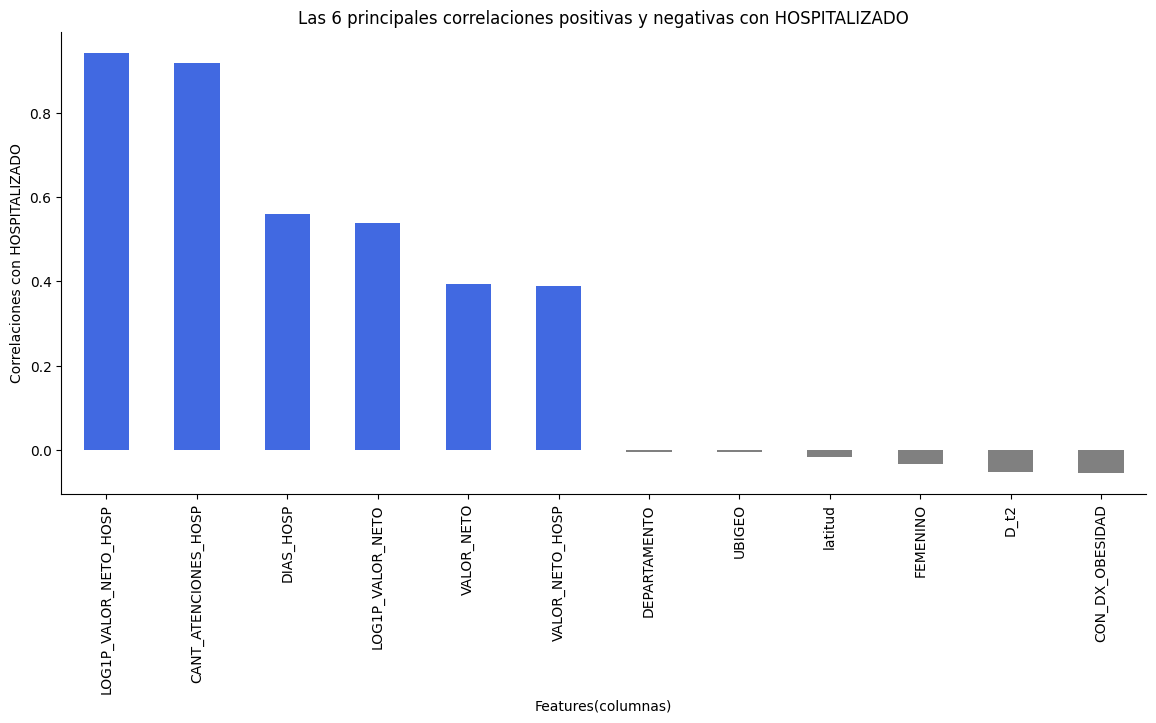

In [ ]:
# Crear un mapa de  colores para el gráfico
colors = ['#4169E1'] * len(top_positive_features) + ['gray'] * len(top_negative_features)

# Crear un gráfico de barras para las correlaciones seleccionadas
plt.figure(figsize=(14, 6))
sorted_corr[selected_features].plot.bar(color=colors)

# Agregar etiquetas y título
plt.xlabel('Features(columnas)')
plt.ylabel('Correlaciones con HOSPITALIZADO')
plt.title('Las 6 principales correlaciones positivas y negativas con HOSPITALIZADO')

# Customizar la estética del gráfico
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mostrar el gráfico
plt.show()



---





---



BÚSQUEDA DE COLUMNAS IMPORTANTES POR USO DE RFE

RECURSIVE FEATURE ELIMINATION (RFE) WITH LOGISTIC REGRESSION

In [ ]:
X = caracteristicas_importantes.drop(columns=['HOSPITALIZADO'])
y = caracteristicas_importantes['HOSPITALIZADO']

In [ ]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['CON_DX_OBESIDAD', 'CANT_ATENCIONES', 'CANT_ATENCIONES_HOSP',
       'VALOR_NETO_HOSP', 'DIAS_HOSP', 'latitud', 'longitud',
       'LOG1P_VALOR_NETO', 'LOG1P_VALOR_NETO_HOSP', 'D_t2'],
      dtype='object')


Se obtuvo esta lista luego de aplicar RFE:


['CON_DX_OBESIDAD', 'CANT_ATENCIONES', 'CANT_ATENCIONES_HOSP',
       'VALOR_NETO_HOSP', 'DIAS_HOSP', 'latitud', 'longitud',
       'LOG1P_VALOR_NETO', 'LOG1P_VALOR_NETO_HOSP', 'D_t2']



---





---



CONFIRMACIÓN/DETECCIÓN DE MULTICOLINEALIDAD

 VARIANCE INFLATION FACTOR (VIF)

In [ ]:
X.columns

Index(['EDAD', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'CON_DX_OBESIDAD', 'CON_DX_HIPERTENSION', 'CON_DX_SALUDMENTAL',
       'CANT_ATENCIONES', 'VALOR_NETO', 'CANT_ATENCIONES_HOSP',
       'VALOR_NETO_HOSP', 'DIAS_HOSP', 'UBICACION', 'latitud', 'longitud',
       'AÑO', 'LOG1P_VALOR_NETO', 'LOG1P_VALOR_NETO_HOSP', 'D_a_desn', 'D_t1',
       'D_t2', 'Otras_D_no_esp', 'FEMENINO', 'MASCULINO'],
      dtype='object')

In [ ]:
# Define las columnas a mantener
keep_cols = [
    'CON_DX_OBESIDAD', 'CANT_ATENCIONES', 'CANT_ATENCIONES_HOSP',
    'VALOR_NETO_HOSP', 'DIAS_HOSP', 'latitud', 'longitud',
    'LOG1P_VALOR_NETO', 'D_t2', 'FEMENINO','D_a_desn'
]

# Selecciona las columnas de X para crear X2
X2 = X[keep_cols]

In [ ]:
X2.columns

Index(['CON_DX_OBESIDAD', 'CANT_ATENCIONES', 'CANT_ATENCIONES_HOSP',
       'VALOR_NETO_HOSP', 'DIAS_HOSP', 'latitud', 'longitud',
       'LOG1P_VALOR_NETO', 'D_t2', 'FEMENINO', 'D_a_desn'],
      dtype='object')

In [ ]:
# Añadir un término constante para el Intercepto
X_with_intercept = pd.concat([pd.Series(1, index=X2.index).rename('Intercept'), X2], axis=1)

# Calcular VARIANCE INFLATION FACTOR
vif = pd.DataFrame()
vif["Variable"] = X_with_intercept.columns
# Se usa variance_inflation_factor directamente
vif["VIF"] = [variance_inflation_factor(X_with_intercept.values, i) for i in range(X_with_intercept.shape[1])]

# Se ordenan los valores VIF en orden descendente para una interpretación más fácil
vif = vif.sort_values('VIF', ascending=False)

# Imprimir los resultados VIF
print(vif)

                Variable     VIF
0              Intercept 1856.86
8       LOG1P_VALOR_NETO    2.00
5              DIAS_HOSP    1.96
3   CANT_ATENCIONES_HOSP    1.70
6                latitud    1.61
4        VALOR_NETO_HOSP    1.60
7               longitud    1.60
2        CANT_ATENCIONES    1.55
1        CON_DX_OBESIDAD    1.06
9                   D_t2    1.03
11              D_a_desn    1.03
10              FEMENINO    1.03


OBSERVACIONES:

Estuve probando distintas combinaciones al incluir D_t2 y D_t1 aumenta la multicolinearidad, como también al incluir MASCULINO y FEMENINO

LOG1P_VALOR_NETO y DIAS_HOSP están casi nada excedidos del rango aceptable de nivel de Multicolinealidad